![](brain.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plot

# Régressions et fonctions non linéaires

## Mise en situation
Un cas d'école aujourd'hui : je veux modéliser un XOR (la fonction _OU exclusif_) via une régression logistique.

Et j'y arrive pas...

_Note: le sujet parait bête et bateau, mais il a une importance historique..._

## Introduction au sujet
La semaine prochaine, on attaquera les réseaux de neurones. Mais pour finir cette semaine dans le monde du non-supervisé, j'ai imaginé cette introduction au sujet "Réseau de neurones" qui fait intervenir une partie de "non-supervision" dans le concept. Si si, vous verrez plus bas :)

Du coup, je sais que ce que j'expose est clairement un réseau de neurones, mais philosophiquement parlant la machine va trouver toute seule une configuration de sa couche intermédiaire - et si vous n'avez rien compris à ce passage c'est pas grave, c'est pour Lundi prochain :D


## Les régressions logistiques
### Les limites de décision

Comme on a déjà pu le voir les semaines précédentes, la régression logistique permet de tracer une limite entre les données "dans la classe" et les données "hors de la classe".

Pour une régression linéaire qui sert de base à la régression logistique, ça sera un point en 1D, une droite en 2D, un plan en 3D etc...

### Le XOR
XOR est la fonction qui, on le rappelle, renvoie 1 si et seulement si une seule des deux opérandes vaut 1, et 0 sinon. Plusieurs définitions équivalentes:
* A xor B = (A ET !B) OU (!A ET B)
* A xor B = (A OU B) ET (!A OU !B)
* A xor B = (A =/= B) _oui parce que si A et B sont différents mais à valeur dans [0,1] c'est ce qu'on cherche_

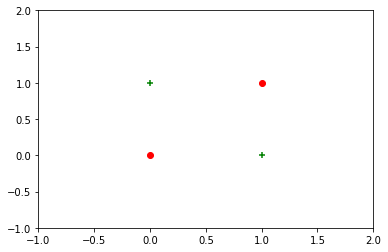

In [2]:
plot.xlim(-1, 2)
plot.ylim(-1, 2)
plot.scatter([0,1],[0,1],color='r', marker = 'o')
plot.scatter([0,1],[1,0],color='g', marker = '+')
plot.show()

Et on le voit, il n'est pas possible de tracer une droite qui va séparer les verts des rouges...

### La triche polynomiale
Comme on l'a vu (jour 2), la régression linéaire peut devenir polynomiale, et servir de base à une régression logistique. On va pouvoir contourner le souci en ajoutant par exemple une valeur _C=A*B_ avec nos données A et B. Une version linéaire serait alors A+B-2C par exemple : on vérifiera que ça vaut 1 pour A = 1 et B = 0 ou l'inverse.

Par contre, on l'a vu aussi, ajouter de la complexité polynomiale un peu au hasard c'est couteux, et en plus on n'aura souvent pas d'autre choix que de taper au hasard...

### Découpage du problème
On va considérer dans un premier temps par exemple les fonctions suivantes: (A OU B), (!A OU !B), (A ET B)

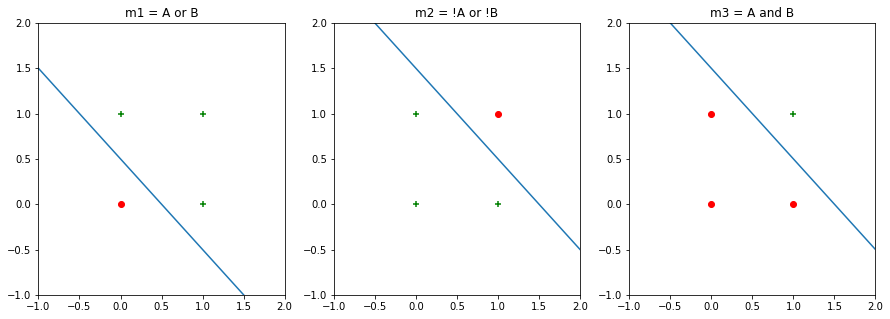

In [3]:
fig = plot.figure(figsize=(15,5))

fig.add_subplot(131)
plot.xlim(-1, 2)
plot.ylim(-1, 2)
plot.scatter([0,1,1],[1,0,1],color='g', marker = '+')
plot.scatter([0],[0],color='r', marker = 'o')
plot.plot([-1, 1.5], [1.5, -1])
plot.title('m1 = A or B')
fig.add_subplot(132)
plot.xlim(-1, 2)
plot.ylim(-1, 2)
plot.scatter([1,0,0],[0,1,0],color='g', marker = '+')
plot.scatter([1],[1],color='r', marker = 'o')
plot.plot([-1, 2.5], [2.5, -1])
plot.title('m2 = !A or !B')
fig.add_subplot(133)
plot.xlim(-1, 2)
plot.ylim(-1, 2)
plot.scatter([0,0,1],[0,1,0],color='r', marker = 'o')
plot.scatter([1],[1],color='g', marker = '+')
plot.plot([-1, 2.5], [2.5, -1])
plot.title('m3 = A and B')
plot.show()

On voit bien que pour ces fonctions, on peut tout à fait séparer les bonnes et les mauvaises valeurs par une simple droite.

Accessoirement, on a aussi : A xor B = (A ou B) et (!A ou !B) = m3(m1(A, B), m2(A, B)). Autrement dit, on peut composer des modèles de régression logisique à base linéaire les uns après les autres et avoir un résultat non linéaire !

La preuve par l'exemple:

In [11]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def probability(x, theta):
    return sigmoid(np.dot(x, theta))

def train_model(x, y, epochs = 1000, alpha = 0.1):
    # Pas vraiment besoin de normaliser...
    m,n = x.shape
    x = np.concatenate([np.ones((m, 1)), x], axis = 1)
    thetas = np.zeros((n+1, 1))
    for i in range(epochs):
        errors = probability(x, thetas) - y
        grad = np.dot(x.T, errors) / m
        thetas -= alpha * grad
    return thetas

In [12]:
space_set = np.array([[0,0],[0,1],[1,0],[1,1]])

a_or_b         = train_model(space_set, np.array([[0],[1],[1],[1]]))
not_a_or_not_b = train_model(space_set, np.array([[1],[1],[1],[0]]))
a_and_b        = train_model(space_set, np.array([[0],[0],[0],[1]]))

def model_or(a, b): return probability(np.array([[1,a,b]]), a_or_b).item()
def model_not_or(a, b): return probability(np.array([[1,a,b]]), not_a_or_not_b).item()
def model_and(a, b): return probability(np.array([[1,a,b]]), a_and_b).item()

def model_xor(a,b): return model_and(model_or(a,b), model_not_or(a,b)) > .5

for i in space_set:
    print("%i xor %i = %i"%(i[0], i[1], model_xor(i[0], i[1])))

0 xor 0 = 0
0 xor 1 = 1
1 xor 0 = 1
1 xor 1 = 0


Voilà. On a entrainé 3 modèles en apprentissage supervisé, qu'on a combiné pour avoir un xor. C'est bien :)

### L'importance de la sigmoide (ou autre fonction non linéaire)
Il convient de noter qu'empiler des régressions linéaires ne sert à rien. Faire une combinaison linéaire de combinaisons linéaires, ça reste une simple combinaison linéaire. Les facteurs sont juste différents.

Ce qui fait que ça marche, c'est la cassure de la linéarité lors du passage à la sigmoide. On appelle ce passage _activation_, et la sigmoide n'est qu'une des _fonctions d'activation_ possibles.

## Retour à la mise en situation
### Les 3 fonctions intermédiaires
Dans ce cas précis, c'est facile, on connaissait déjà les trois fonctions à modéliser - ou on les a deviné par un travail de réflexion en amont. Mais est-ce que le système ne pourrait pas, tout seul, trouver ces quelques fonctions à notre place ? En gros, faire une régression logistique à deux étages quoi !

### Modèle
Le modèle qu'on va essayer de coller est défini par $\theta_0, ..., \theta_8$ (y'en a 9 quoi) tels que:

$\begin{cases}
f_1(a,b) = \theta_0 + \theta_1*a + \theta_2 * b\\
s_1(a,b) = \sigma(f1(a,b))\\
f_2(a,b) = \theta_3 + \theta_4*a + \theta_5 * b\\
s_2(a,b) = \sigma(f2(a,b))\\
f_3(a,b) = \theta_6 + \theta_7*s_1(a,b) + \theta_8 * s_2(a,b)\\
s_3(a,b) = \sigma(f3(a,b))
\end{cases}$

avec $\sigma$ la fonction sigmoide.

Le coût se défini par :

$J(\theta_0,...,\theta_8) = -\frac{1}{m}\sum_{a,b \in X_{train}\\
y \in Y_{train}}\left[y.log(s_3(a,b)) + (1-y).log(1-s_3(a,b))\right]$

On pourrait bien sur faire une fonction globale en détaillant tout, mais ça va être imbuvable, surtout pour la partie qui arrive : la dérivée du coût

### Le gradient

Plutôt que de se palucher toute la dérivée d'un coup, on va partir de la propriété suivante : $(f(g(x))' = f'(g(x)) * g'(x)$, la dérivée d'une composée de fonctions.

* la dérivée de $y.log(x) + (1-y).log(1-x)$ est $\frac{y}{x} - \frac{1-y}{1-x}$
  * donc $J' = -\frac{1}{m}\sum\left[\frac{y}{s_3} - \frac{1-y}{1-s_3}\right] * s_3'$
* la dérivée de $\sigma(x)$ est $\sigma(x).(1-\sigma(x))$
  * donc $s_3' = s_3.(1-s_3).f_3'$
* $f_3' = \theta_6'$ si on dérive par rapport à $\theta_6$
* $f_3' = s_1.\theta_7'$ si on dérive par rapport à $\theta_7$
* $f_3' = s_2.\theta_8'$ si on dérive par rapport à $\theta_8$

On récapitule : on a trouvé les dérivées de $J$ par rapport aux trois derniers paramètres $\theta$.

On continue de remonter pour les autres paramètres :

* $f_3' = \theta_7 * s_1'$ si on dérive par rapport à $s_1$
* $s_1' = s_1.(1-s_1).f_1'$
* $f_1' = \theta_0'$ si on dérive par $\theta_0$
* $f_1' = a.\theta_1'$ si on dérive par $\theta_1$
* $f_1' = b.\theta_2'$ si on dérive par $\theta_2$

Et idem pour la partie $s_2, f_2, ...$


### Implémentation

Comme ça fait beaucoup d'un coup et que c'est pas forcément évident, l'implémentation ci-dessous traite volontairement tous les exemples d'entrainement un par un. Ca va être plus long de les calculer et de les sommer, mais au moins ça sera plus clair qu'avec des produits matriciels. _Ca sera pour la semaine prochaine_

Et pour ne pas faire d'erreurs, on va y aller par étapes.

* Tout d'abord la fonction "résultat", ou "passe vers l'avant", qui passe à travers f1, s1, f2, s2, f3 et s3:

In [6]:
def f(a, b, thetas):
    # Première fonction
    f1 = thetas[0] + thetas[1] * a + thetas[2] * b
    s1 = sigmoid(f1)

    # Deuxième fonction
    f2 = thetas[3] + thetas[4] * a + thetas[5] * b
    s2 = sigmoid(f2)

    # Troisième fonction
    f3 = thetas[6] + thetas[7] * s1 + thetas[8] * s2
    s3 = sigmoid(f3)
    return s3, f3, s2, f2, s1, f1

* Maintenant, le calcul du gradient "en marche arrière" :

In [7]:
def grad_f(a, b, y, thetas, f1, s1, f2, s2, f3, s3):
    dthetas = np.zeros(9)
    # Dérivées du cout (notation: dZ = dérivée de J par rapport à Z)
    # Partie f3
    ds3 = y/s3 - (1-y)/(1-s3)
    df3 = ds3 * s3 * (1-s3)
    dthetas[6] += df3
    dthetas[7] += df3 * s1
    dthetas[8] += df3 * s2

    # Partie f1
    ds1 = thetas[7] * df3
    df1 = ds1 * s1 * (1-s1)
    dthetas[0] += df1
    dthetas[1] += df1 * a
    dthetas[2] += df1 * b

    # Partie f2
    ds2 = thetas[8] * df3
    df2 = ds2 * s2 * (1-s2)
    dthetas[3] += df2
    dthetas[4] += df2 * a
    dthetas[5] += df2 * b
    return dthetas

* Et pour finir, le modèle qui fait une descente de gradient - on reviendra sur l'initialisation des thetas

In [8]:
def two_layers(X, Y, epochs = 1000, alpha = 0.1):
    thetas = np.random.rand(9)
    thetas[0] = thetas[3] = thetas[6] = 0
    costs = np.zeros(epochs)
    
    for i in range(epochs):
        # Traitement des exemples 1 par 1, pour s'y retrouver
        dthetas = np.zeros(9)
        for j in range(X.shape[0]):
            a,b = X[j,:]
            y = Y[j]
            # Calcul du résultat "en avant"
            s3, f3, s2, f2, s1, f1 = f(a,b,thetas)
            costs[i] += y * np.log(s3) + (1-y)*np.log(1-s3)
            # Calcul du gradient "en arrière"
            dthetas += grad_f(a,b,y, thetas, f1, s1, f2, s2, f3, s3)
        # Division par -m comme le veut la formule de J
        dthetas *= -1/X.shape[0]

        # Descente de gradient
        thetas -= alpha * dthetas

    return thetas, costs / -X.shape[0]

C'est parti : on va entrainer le modèle, afficher l'évolution du coût, et regarder le résultat.

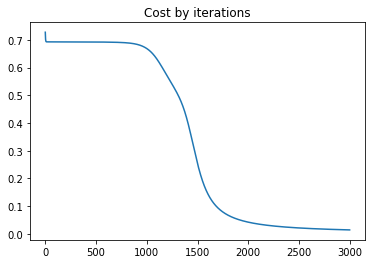

0 xor 0 = False
0 xor 1 = True
1 xor 0 = True
1 xor 1 = False


In [9]:
iterations = 3000
np.random.seed(2)
thetas, costs = two_layers(space_set, np.array([0,1,1,0]), epochs = iterations, alpha = 0.5)
plot.plot(np.arange(iterations),costs)
plot.title('Cost by iterations')
plot.show()

for i in space_set:
    print("%i xor %i = %s" %(i[0], i[1], f(i[0], i[1], thetas)[0] > .5))


Alors OK, c'est du supervisé. Mais il faut bien voir ce qu'a fait le modèle : il a
* trouvé deux fonctions f1 et f2 appliquées aux entrées a et b
* trouvé une fonction f3 appliquée aux résultats de f1 et f2
* et tel que le tout fasse un xor

On va afficher la table de verité pour chacune et les identifier.

In [10]:
def f_i(a, b, thetas, i):
    return sigmoid(thetas[3*i-3] + a * thetas[3*i-2] + b*thetas[3*i-1])

for i in space_set:
    print("f1(%i, %i) = %i" %(i[0], i[1], f_i(i[0], i[1],thetas, 1)>.5))
print('---')
for i in space_set:
    print("f2(%i, %i) = %i" %(i[0], i[1], f_i(i[0], i[1],thetas, 2)>.5))
print('---')
for i in space_set:
    print("f3(%i, %i) = %i" %(i[0], i[1], f_i(i[0], i[1],thetas, 3)>.5))
    

f1(0, 0) = 0
f1(0, 1) = 0
f1(1, 0) = 0
f1(1, 1) = 1
---
f2(0, 0) = 0
f2(0, 1) = 1
f2(1, 0) = 1
f2(1, 1) = 1
---
f3(0, 0) = 0
f3(0, 1) = 1
f3(1, 0) = 0
f3(1, 1) = 0


* f1 correspond à "A et B" : le modèle a décidé qu'il aurait besoint d'un AND
* f2 correspond à "A ou B" : le modèle a décidé qu'il aurait besoint d'un OR
* f3 correspond à "non F1 et F2". Littéralement : je n'ai pas à la fois A et B mais j'ai au moins un des deux : c'est un XOR !

Note : suivant les valeurs du seed, on peut obtenir des résultats différents : le système trouvera peut-être un OR, un NAND et un AND; ou toute autre combinaison qui marche bien.

Contrairement à une régression classique, ici on a eu besoin de sous-résultats supplémentaires, mais le système a appris de lui-même quels étaient les sous-résultats les plus pertinents. Oui, c'est du supervisé, c'est même un réseau de neurones ultra spécifique. Mais conceptuellement, f3 est une régression logistique classique pour laquelle le système a déterminé tout seul quelles seraient les meilleures entrées.

Voilà qui achève de faire le pont entre le sujet de la semaine (le non-supervisé) et celui de la semaine prochaine (les réseaux de neurones)